In [374]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from proj1_helpers import load_csv_data
from functions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**1. LOAD THE DATA**

In [517]:
train_set = load_csv_data('Data/train.csv', sub_sample = False)
test_set = load_csv_data('Data/test.csv', sub_sample = False)

**2. SET UP THE DATA**

In [518]:
x = train_set[1]
y = train_set[0]
ids = train_set[2]

x_train, x_test, y_train, y_test = split_data_tr_te(x, y, 0.05)

x_train = train_set[1]
y_train = train_set[0]
ids_train = train_set[2]

x_test = test_set[1]
y_test = test_set[0]
ids_test = test_set[2]

In [519]:
na_indices = get_na_columns(x_train, 0.7)

In [520]:
na_indices

[4, 5, 6, 12, 26, 27, 28]

In [521]:
x_train_clean = np.delete(x_train, na_indices, axis = 1)

In [522]:
x_test_clean= np.delete(x_test, na_indices, axis = 1)

In [523]:
na_indices_rem = get_na_columns(x_train_clean, 0)

In [524]:
na_indices_rem

[0, 19, 20, 21]

In [525]:
x_train_clean_2 = predict_na_columns(x_train_clean, na_indices_rem)
x_test_clean_2 = predict_na_columns(x_test_clean, na_indices_rem)

In [526]:
x_train_std, x_test_std = standardize(x_train_clean_2, x_test_clean_2)
x_train_std_int = np.column_stack((np.ones(x_train_std.shape[0]), x_train_std))
x_test_std_int = np.column_stack((np.ones(x_test_std.shape[0]), x_test_std))

In [527]:
x_train_std_, x_test_std_ = standardize(x_train, x_test)
x_train_std_int_ = np.column_stack((np.ones(x_train_std_.shape[0]), x_train_std_))
x_test_std_int_ = np.column_stack((np.ones(x_test_std_.shape[0]), x_test_std_))

**3. CLEAN THE DATA**

**3. DEFINE THE FUNCTIONS**

In [ ]:
def least_squares(y, tx):
    A = tx.T@tx
    b = tx.T@y
    w = np.linalg.solve(A, b)
    loss = compute_mse(y, tx, w)
    return w, loss

In [ ]:
def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    ws = [initial_w]
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient_least_square(y, tx, w)
        loss = compute_mse(y, tx, w)
        w = w - gamma*gradient
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return w, loss

In [ ]:
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):    
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_mse(minibatch_y, minibatch_tx, w)
            new_w = w - gamma*gradient
            w = new_w
            ws.append(w)
            losses.append(loss)
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return ws, losses

In [ ]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    aI = lamb * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    loss = compute_mse(y, tx, w)
    return w, loss

In [ ]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    loss, w = gradient_descent_log_reg(y, tx, initial_w, max_iters, gamma)
    return w, loss

In [ ]:
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    loss, w = reg_gradient_descent_log_reg(y, tx, lambda_, initial_w, max_iters, gamma)
    return w, loss

**4.CROSS VALIDATION VIZUALIZATION**

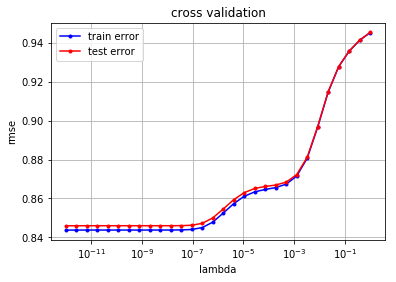

In [528]:
cross_validation_demo(y_train, x_train_std_int, 1)

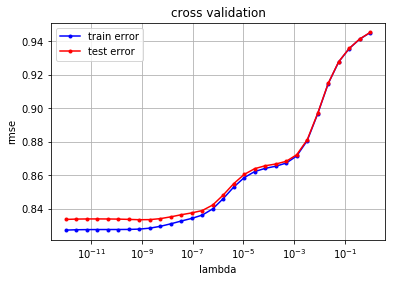

In [529]:
cross_validation_demo(y_train, x_train_std_int, 2)

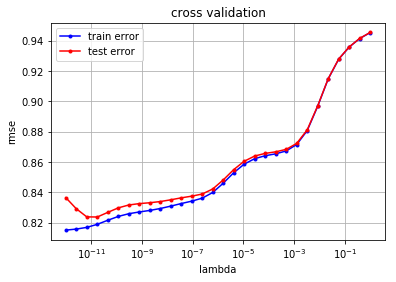

In [530]:
cross_validation_demo(y_train, x_train_std_int, 3)

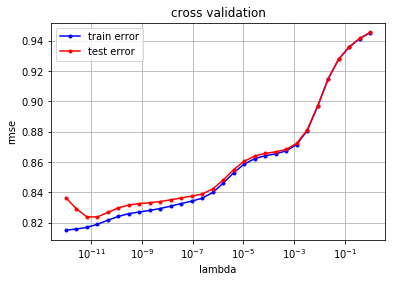

In [535]:
cross_validation_demo(y_train, x_train_std_int, 4)

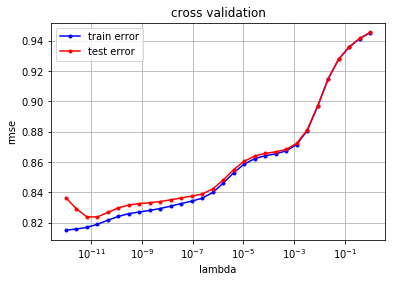

In [536]:
cross_validation_demo(y_train, x_train_std_int, 5)

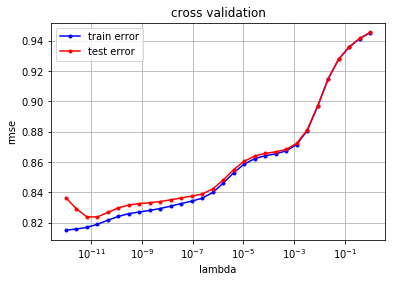

In [537]:
cross_validation_demo(y_train, x_train_std_int, 6)

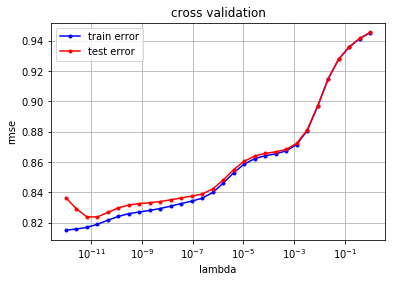

In [538]:
cross_validation_demo(y_train, x_train_std_int, 7)

**4. GET THE MODEL**

In [540]:
x_train_3 = build_poly(x_train_std_int, degree = 3)

In [541]:
w, loss = ridge_regression(y_train, x_train_3, 10**(-11))

In [542]:
x_test_3 = build_poly(x_test_std_int, degree = 3)

In [543]:
y_pr = np.around(sigmoid(x_test_3@w)).astype(int)
y_pred = zero_to_neg(y_pr).astype(int)

In [544]:
def test_pred(y_test, y_pred):
    acc = 1 - np.sum(np.abs(y_test - y_pred)) / len(y_test) * 0.5
    return acc

In [545]:
acc = test_pred(y_test, y_pred)

In [546]:
acc

0.75610105263157901

In [504]:
s = np.column_stack((ids_test, y_pred))

In [505]:
s_df = pd.DataFrame(s)
s_df.columns = ['Id', 'Prediction']

In [506]:
len(s_df)

568238

In [466]:
s_df.to_csv('Data/23_submit_prediction_rid_reg_deg_3_10-8_clean_clean.csv', index=False)